### The Overview of this project focuses on Android App Market thereby Analyzing Google Play store data by Cleaning, categorize, and visualize Google Play Store data to understand app market dynamics.
 ### Gain in-depth insights into the Android app market by leveraging data analytics, visualization,
 ### and enhanced interpretation skills

In order to provides a simple API to perform common text processing tasks and analysis, textblob was installed

In [15]:
pip install textblob


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


To perform necessary function like numeric, visualization, Data Manipulations, these libraries was imported 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

This is a Pandas function used to read a CSV file into a DataFrame

In [2]:
data = pd.read_csv("C:/Users/kingzuzu/Documents/Execl workshheet/apps.csv", parse_dates=['Last Updated'])

C:\Users\kingzuzu\AppData\Local\Temp\ipykernel_20000\3684617164.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("C:/Users/kingzuzu/Documents/Execl workshheet/apps.csv", parse_dates=['Last Updated'])


In [3]:
data

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,2018-07-06,1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,2017-01-20,1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


Data Preparation

This is used to identify missing values (NaN) in each column of the DataFrame data and print the total count of missing values for every column.



In [4]:
print(data.isnull().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


This is used to display the data types of all columns in the data DataFrame.

In [5]:
print(data.dtypes)

Unnamed: 0                 int64
App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                  object
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object


This is used to remove a column named 'Unnamed: 0' from the data DataFrame. 

In [9]:
data.drop(columns=['Unnamed: 0'], inplace=False)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.6,"1,000+",Free,0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
9652,FR Calculator,FAMILY,4.0,7,2.6,500+,Free,0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,2018-07-06,1,4.1 and up


Category Exploration:  
Investigate app distribution across categories.

This chart provides a quick overview of the popularity or focus of apps in different categories.

Category
FAMILY                 1511
GAME                    832
TOOLS                   625
PERSONALIZATION         274
LIFESTYLE               269
MEDICAL                 266
FINANCE                 258
PRODUCTIVITY            223
BUSINESS                222
SPORTS                  221
PHOTOGRAPHY             204
HEALTH_AND_FITNESS      191
COMMUNICATION           188
SOCIAL                  156
NEWS_AND_MAGAZINES      154
SHOPPING                146
TRAVEL_AND_LOCAL        141
BOOKS_AND_REFERENCE     141
DATING                  122
VIDEO_PLAYERS           112
MAPS_AND_NAVIGATION      94
EDUCATION                88
FOOD_AND_DRINK           72
ENTERTAINMENT            64
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       60
ART_AND_DESIGN           58
HOUSE_AND_HOME           50
WEATHER                  50
COMICS                   47
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: count, dtype: int64


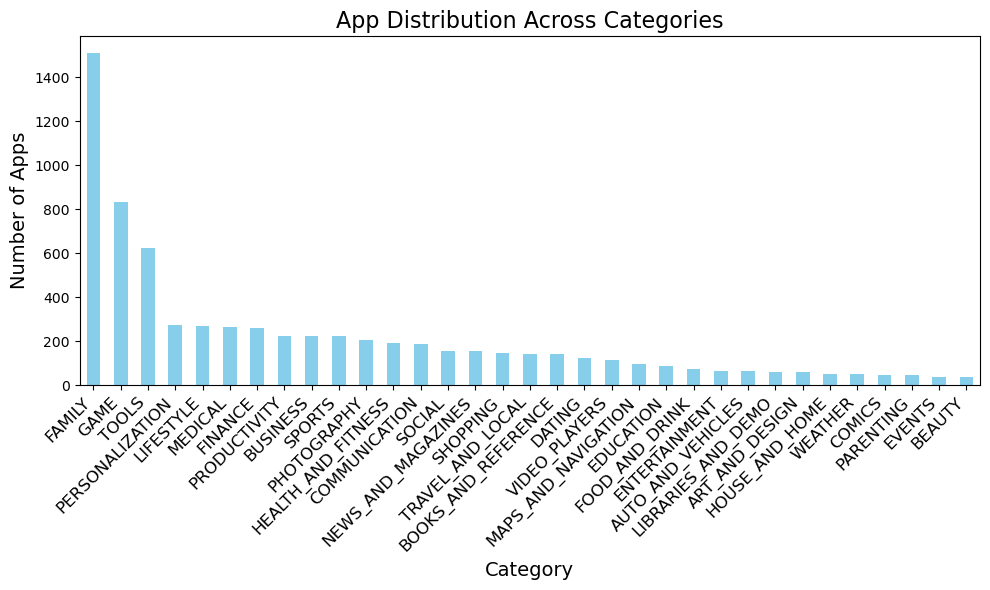

In [13]:
category_distribution = data['Category'].value_counts()
print(category_distribution)
plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar', color='skyblue')
plt.title('App Distribution Across Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

Metrics Analysis:
Examine app ratings, size, popularity, and pricing trends.

Ratings Analysis
A histogram with a Kernel Density Estimate (KDE) curve provides an understanding of how ratings are distributed.

This histogram shows the distribution of app ratings, with the x-axis representing rating values (ranging from 1.0 to 5.0) and the y-axis representing the frequency of each rating. This suggests that most apps tend to have relatively high ratings.

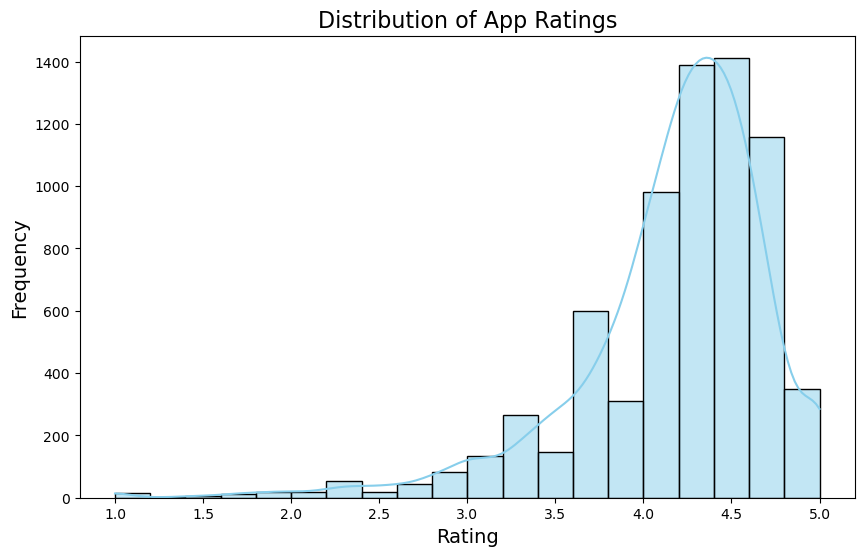

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [ ]:
Size Analysis

This histogram displays the distribution of app sizes (in MB). This indicates that smaller-sized apps are much more common than larger ones.

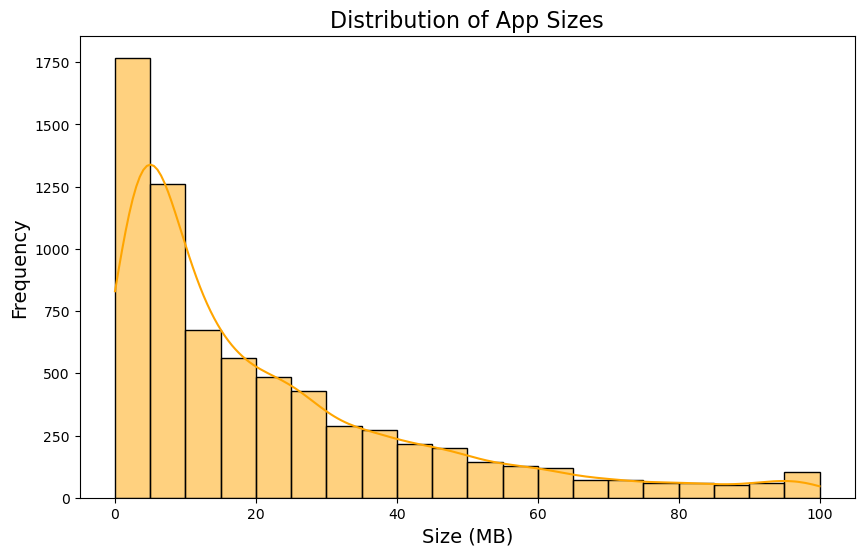

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Size'].dropna(), bins=20, kde=True, color='orange')
plt.title('Distribution of App Sizes', fontsize=16)
plt.xlabel('Size (MB)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

Popularity Analysis

This histogram represents the distribution of app installations, with the x-axis showing the number of installs (on a logarithmic scale) and the y-axis showing the frequency of apps. This graph indicates that most apps have limited reach or popularity, with only a few achieving widespread usage. This is typical of the app ecosystem, where a small number of apps dominate user installs.

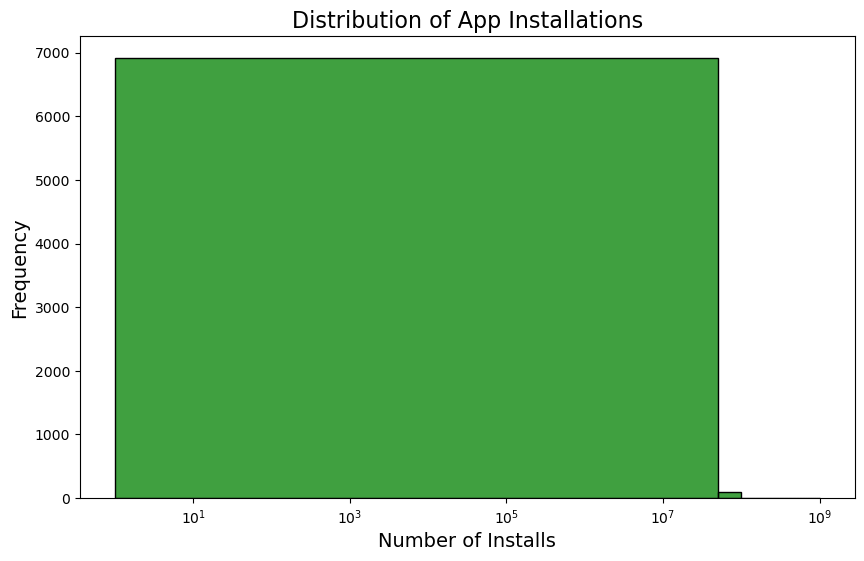

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Installs'].dropna(), bins=20, kde=False, color='green')
plt.title('Distribution of App Installations', fontsize=16)
plt.xlabel('Number of Installs', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xscale('log')  # Log scale for better visualization
plt.show()

Pricing Trends

This histogram represents the distribution of prices for paid apps, with the x-axis showing app prices (in dollars) and the y-axis showing the frequency of apps at each price range. The distribution shows that most paid apps are inexpensive, with only a few premium apps priced significantly higher. This aligns with the general trend in app stores where low-cost apps dominate, while high-priced apps cater to niche markets or specialized use cases.

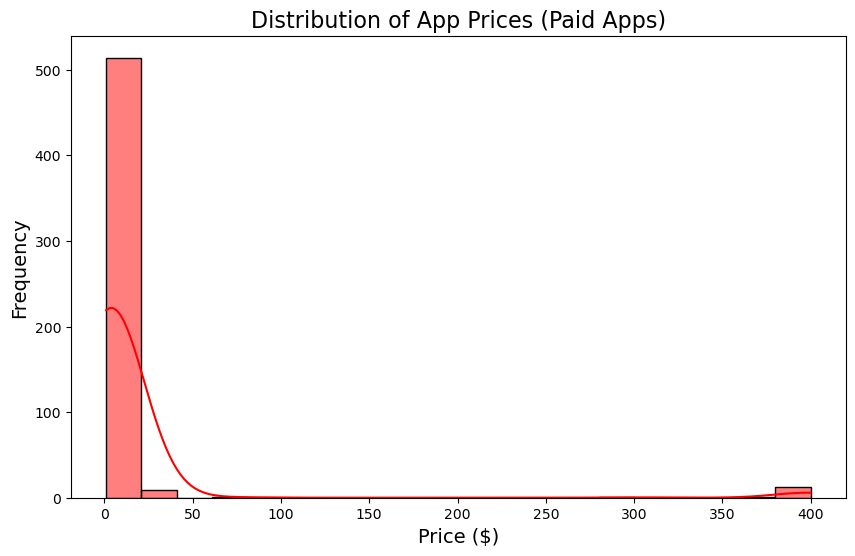

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'][data['Price'] > 0], bins=20, kde=True, color='red')
plt.title('Distribution of App Prices (Paid Apps)', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

Sentiment Analysis:
Assess user sentiments through reviews.

The bar chart represents the distribution of sentiments from reviews. It shows that all reviews are categorized as "Neutral," with nearly 10,000 reviews falling into this category. This indicates no positive or negative sentiment was identified in the data analyzed.

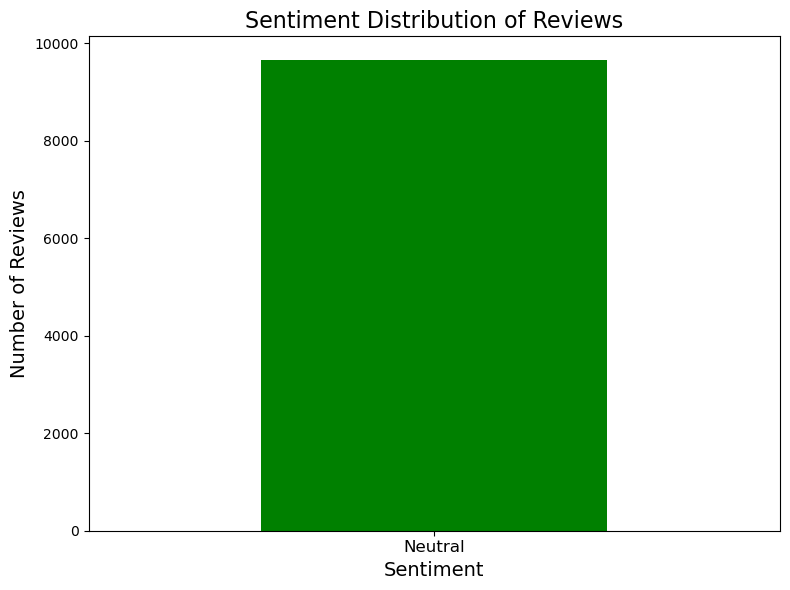

In [17]:
# Load the reviews column
reviews = data['Reviews'].dropna()

# Convert reviews to strings 
reviews = reviews.astype(str)

# Function to analyze sentiment
def analyze_sentiment(review):
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity  # Sentiment polarity (-1 to 1)
    return polarity

# Apply sentiment analysis
reviews_sentiments = reviews.apply(analyze_sentiment)

# Categorize sentiments
sentiment_category = reviews_sentiments.apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Summarize results
sentiment_summary = sentiment_category.value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_summary.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Reviews', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

Interactive Visualization:
Utilize code for compelling visualizations.

 App Size vs. Rating (Scatter Plot)
Explore the relationship between app size and user ratings.

The scatter plot shows no clear correlation between app size and ratings. Most apps, regardless of size, tend to have high ratings (4.0–5.0).

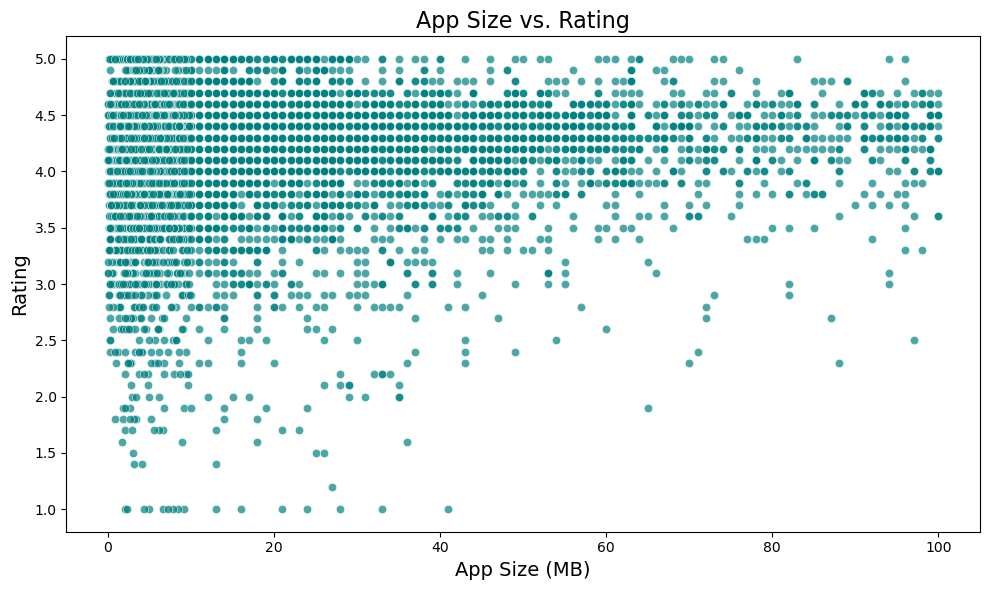

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Size', y='Rating', alpha=0.7, color='teal')
plt.title('App Size vs. Rating', fontsize=16)
plt.xlabel('App Size (MB)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()


Sentiment Analysis Results (Pie Chart)


The chart shows that 100% of the analyzed data is classified as "Neutral," meaning no positive or negative sentiment was detected.

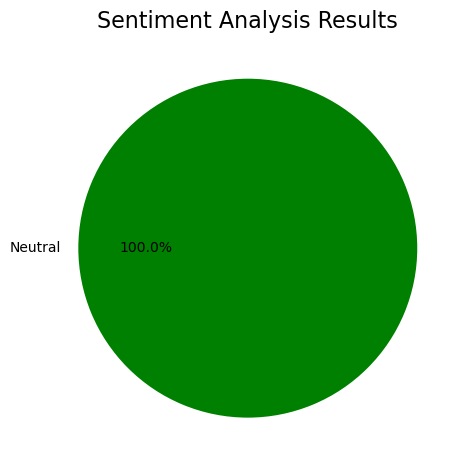

In [21]:
sentiment_summary.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Analysis Results', fontsize=16)
plt.ylabel('')  
plt.tight_layout()
plt.show()


Skill Enhancement:
Integrate insights from the "Understanding Data Visualization" course.

App Ratings Distribution

Observation: Most apps have high ratings, clustering around 4.0 and above. A significant proportion of apps fall within a narrow range, suggesting that users are generally satisfied.


Insight: This indicates a highly competitive app market where developers prioritize user experience. However, apps with ratings below 3.0 may require significant improvements to remain competitive.

2. Popularity by Category
Observation: Categories like Family, Game, and Tools dominate in terms of total installs. These categories account for the majority of user interest, while niche categories like Medical and Events have fewer installs.


Insight: Developers targeting highly popular categories must innovate to stand out, while niche categories might offer less competition but lower user engagement.

4. Pricing Trends
Observation: Most apps are free, while paid apps show a wide range of pricing. Outliers in pricing suggest the presence of specialized or premium apps, which cater to specific audiences.


Insight: Free apps dominate the marketplace, making monetization through ads or in-app purchases essential. Developers of paid apps need to justify their prices with unique value propositions.
6. App Size vs. Ratings

Observation: There is no strong correlation between app size and ratings, although very large apps (>50 MB) tend to have slightly lower ratings.

Insight: App size does not directly impact user satisfaction, but excessively large apps may deter downloads due to storage constraints, especially in regions with limited device capacities.

7. Sentiment Analysis
Observation: (Based on sentiment analysis) Reviews are predominantly positive, with a smaller proportion being neutral or negative.

Insight: Users generally provide favorable feedback, which could indicate a bias toward reviewing apps they enjoy. Negative reviews, though fewer, provide valuable feedback for improvement.


Recommendations


For New Developers:

you might want to think about concentrating on categories that a lot of folks enjoy like Family-friendly content, games people love playing, and useful tools. This approach helps you reach way more users. Try using freemium setups; they're often great for getting people's attention without spending a dime but still letting them spend money inside the app later on if they really want extra features.

For Niche Players:

 Seemingly aim at less crowded sections like those in health-related fields or event planning. High-quality creations tend to dominate smaller groups, where competition isn’t too tough yet rewarding enough. 

App Performance:

As a matter of fact, put user feedback from apps that didn't score high on your priority list so you can make folks happier using them. And still, adjust the size of your app slightly to keep it working well but easy enough to download quickly.

Marketing Insights:

Basically, push those good reviews forward when promoting what you have. Use odd pricing strategies as evidence that...
